### Community:

- Densely connected set of nodes 


In [1]:
import networkx as nx 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
GA = nx.read_gexf('data/ga_graph.gexf')
print(nx.info(GA))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250


### Girvan Newman Algorithm

- The algorithm removes the “most valuable” edge, traditionally the edge with the highest betweenness centrality, at each step.
- As the graph breaks down into pieces, the tightly knit community structure is exposed.



In [6]:
# Returns iterator over tuples of sets of nodes in G.
# Each set of nodes is a community, each tuple is a sequence of communities at a particular level of the algorithm.

gn_comm = nx.community.girvan_newman(GA)
first_iteration_comm = tuple(sorted(c) for c in next(gn_comm))

dict(enumerate(first_iteration_comm))


{0: ['addison',
  'arizona',
  'avery',
  'denny',
  'derek',
  'finn',
  'grey',
  'hank',
  'izzie',
  'karev',
  'kepner',
  'lexi',
  'mrs. seabury',
  'nancy',
  "o'malley",
  'olivia',
  'sloan',
  'steve',
  'torres'],
 1: ['altman', 'colin', 'owen', 'preston', 'yang'],
 2: ['adele', 'chief', 'ellis grey', 'susan grey', 'thatch grey'],
 3: ['bailey', 'ben', 'tucker']}

In [9]:

def map_communities(G, communities):
    """Return a mapping of community membership from a community set tuple"""
    community_map = {}
    for node in G.nodes():
        for i, comm in enumerate(communities):
            if node in comm:
                community_map[node] = i
        if community_map.get(node, None) is None:
            community_map[node] = None
    return community_map

In [13]:
from seaborn import color_palette, set_style, palplot

In [14]:
def create_color_map(G, attribute, seaborn_palette='colorblind'):
    """Returns a list of hex color mappings for node attributes"""
    attributes = [G.nodes[label][attribute] for label in G.nodes()]
    #Get the set of possible attributes
    attributes_unique = list(set(attributes))
    num_values = len(attributes_unique)

    #generate color palette from seaborn
    palette = color_palette(seaborn_palette, num_values).as_hex()

    #create a mapping of attribute to color 
    color_map = dict(zip(attributes_unique,palette))

    #map the attribute for each node to the color it represents
    node_colors = [color_map[attribute] for attribute in attributes]

    return node_colors, color_map, palette

In [15]:
community_map = map_communities(GA, first_iteration_comm)

nx.set_node_attributes(GA, community_map,'community')

node_colors, color_map, palette = create_color_map(GA, 'community')

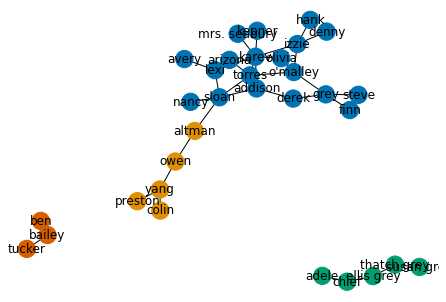

In [16]:
nx.draw(GA, node_color=node_colors, with_labels=True)

In [19]:

second_comm = tuple(sorted(c) for c in next(gn_comm))

community_map_2 = map_communities(GA, second_comm)

nx.set_node_attributes(GA, community_map_2, 'community two')

node_colors, color_map, palette = create_color_map(GA, 'community two')

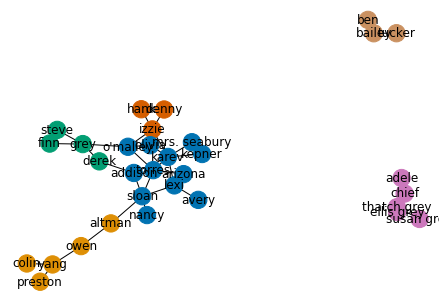

In [20]:
nx.draw(GA, node_color=node_colors, with_labels=True)

### K-Clique Communities:

A clique is a subset of vertices of an undirected graph such that its induced subgraph is complete; that is, every two distinct vertices in the clique are adjacent.

A k-clique community is the union of all cliques of size k that can be reached through adjacent (sharing k-1 nodes) k-cliques.


In [21]:
k_clique = nx.community.k_clique_communities(GA, 2)

In [22]:
dict(enumerate(k_clique))

{0: frozenset({'adele', 'chief', 'ellis grey', 'susan grey', 'thatch grey'}),
 1: frozenset({'addison',
            'altman',
            'arizona',
            'avery',
            'colin',
            'denny',
            'derek',
            'finn',
            'grey',
            'hank',
            'izzie',
            'karev',
            'kepner',
            'lexi',
            'mrs. seabury',
            'nancy',
            "o'malley",
            'olivia',
            'owen',
            'preston',
            'sloan',
            'steve',
            'torres',
            'yang'}),
 2: frozenset({'bailey', 'ben', 'tucker'})}

In [24]:
k_clique = nx.community.k_clique_communities(GA, 3)
dict(enumerate(k_clique))

{}

In [25]:
print("Percent of ALL edges that could exist: %0.2f" % (nx.density(GA) * 100))

Percent of ALL edges that could exist: 6.85
